# Eight Bullet Friday
## TensorFlow Gentle Mental Calisthenics

I am hoping that this Python Notebook will help you examine the code we ran last week.

### Bullet 1. Import the libraries
In the code space below import the tensorflow library and the mnist example data. Also print the tensorflow version and set the random_set



In [8]:
import numpy as np
import matplotlib.pyplot as plt
# add your imports here
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data as mnist_data
print("Tensorflow version " + tf.__version__)
tf.set_random_seed(0)

/Users/raz/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Tensorflow version 1.4.1


### Bullet 2: Download the data 
Download both the MNIST data (images) and their labels

In [9]:
mnist = mnist_data.read_data_sets("data", one_hot=True, reshape=False, validation_size=0)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


### Bullet 3: Grab the first 10 images and their labels
You will create 2 variables-- one for the image data and the other for the labels


In [10]:
batch_X, batch_Y = mnist.train.next_batch(100)

### Bullet 4: Get one image
Create a variable `image1` that contains the 2d array that is the first image in the first 10 images.

In [11]:
# Your code here.
image1 = batch_X[0]
print(image1)

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

### A cool thing about numpy
Numpy has a cool feature called broadcasting. It is easiest just to show you what it does. Suppose we have an array:

     [[1, 2, 3, 4],
      [5, 6, 7, 8]]

In [4]:
sample = np.array([[1,2,3,4],[5,6,7,8]])
sample

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

and let's suppose we want to add 10 to each element in the array. We can do so by:

In [5]:
sample + 10

array([[11, 12, 13, 14],
       [15, 16, 17, 18]])

or if we wanted to mulitply it by 2:
2 * sample

In [6]:
2 * sample

array([[ 2,  4,  6,  8],
       [10, 12, 14, 16]])

### Bullet 5 - display the sample image
In the previous step we set `image` to hold the 2d array of the first image. Let's go ahead and display that image:


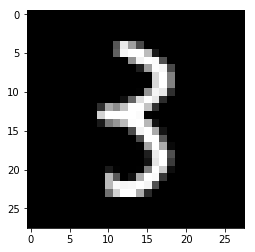

In [13]:
first_image = np.array(image1, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

That's cool, but we would much rather see a black number on a white background. Can you display the second image of our initial ten in that way?

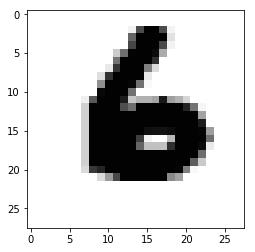

In [14]:
first_image = 1- np.array(batch_X[1], dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

### Bullet 6: The labels
When we downloaded the data we also downloaded the labels for the data. Print out the label for the first image of our batch of 10. And then print out the label of the second.

In [17]:
print(batch_Y[0])
print(batch_Y[1])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Maybe you were expecting a single number like **3** or **6**. How do you interpret the label value?

### Step 7: Matrix Multiplication

In our discussion we had customers rate different genres:

**P**

Customers | dream pop | neo | R&B
:---: | :---: |  :---: |  :---: | 
Sam | 5 | 2 | 4
Mary | 1 | 5 | 3
Ben | 1 | 3 | 5
Julie | 1 | 1 | 5

**Q**

artist | dream pop | neo | R&B
:---: | :---: |  :---: |  :---: | 
Dua Lipa | 5 | 1 | 4
Midland | .5 | 5 | 1
Bruno Mars | 3 | 1 | 5
Lorde | 4 | 2 | 2	
Bebe Rexha | 3 | 1 | 3

And by hand we computed

$$PQ^T$$

Let's see how we can do this in numpy. First, let's create a numpy array for the customers:

In [27]:
p = np.array([[5., 2., 4.], [1., 5., 3.], [1., 3., 5.], [1., 1., 5.]])
p

array([[5., 2., 4.],
       [1., 5., 3.],
       [1., 3., 5.],
       [1., 1., 5.]])

Cool. Can you do the same (create a q variable this time) for the artist table?

In [24]:
q = np.array([[5.,1.,4.], [.5, 5., 1.], [3., 1., 5.], [4., 2., 2.], [3., 1., 3.]])
q

array([[5. , 1. , 4. ],
       [0.5, 5. , 1. ],
       [3. , 1. , 5. ],
       [4. , 2. , 2. ],
       [3. , 1. , 3. ]])

Ok.

We can transpose a matrix in numpy using

     np.transpose()
     
For example, if we want to transpose a matrix *a* and assign it to the variable *aT* we could do

     aT = np.transpose(a)

In [25]:
qT = np.transpose(q)

In [28]:
np.matmul(p, qT)

array([[43. , 16.5, 37. , 32. , 29. ],
       [22. , 28.5, 23. , 20. , 17. ],
       [28. , 20.5, 31. , 20. , 21. ],
       [26. , 10.5, 29. , 16. , 19. ]])

So you should get the same values we did when we did it by hand.

Tensorflow also has a matrix multiplication function, called `matmul` so for example

In [31]:
predictions = tf.matmul(p, qT)

Go ahead and print the value of `predictions`

You will see that it does not print the nice matrix that the `numpy.matmul` did. 

###  Bullet 8 Sessions
In tensorflow when we write and execute code like:

     prediction = tf,matmul(a, b)
     
 or
 
     Y = tf.nn.softmax(tf.matmul(XX, W) + b)
     ...
     cross_entropy = -tf.reduce_mean(Y_ * tf.log(Y)) * 1000.0 
     
Tensorflow doesn't evaluate the results of that assignment. What it does is construct a graph where operations like matrix multiplications are nodes in a graph. For example:


![](https://photos-1.dropbox.com/t/2/AADclR2gSB6Qxoytibc0QoZ4otrzIBys81_yLBgPO2lBhw/12/27548/png/32x32/3/1517000400/0/2/Screenshot%202017-12-17%2014.34.25.png/EL74IBizlLPlBCAHKAc/EWMhasd9gzVkXl9kob1_dZNFk2nJ2zPyNifNgdaTWIo?dl=0&preserve_transparency=1&size=1600x1200&size_mode=3)


You can **deploy** (think run or execute) the graph by first binding the graph to a particular **session**. A session is a particular execution environment, which includes whether you are running it on a CPU or a cluster of GPUs.

In the code we executed last week we had the lines:

     init = tf.global_variables_initializer()
     sess = tf.Session()
     sess.run(init)
     
So we created a session and that ran it (*deployed the graph*). In this Python notebook we are playing around with things rather than setting up a high-falutin graph, so we can do something like:




In [33]:
sess = tf.InteractiveSession()

Which, as the name suggests, starts an interactive session. Now we can evaluate the graph we created with

     predictions = tf.matmul(p, qT)

above

In [34]:
predictions.eval()

array([[43. , 16.5, 37. , 32. , 29. ],
       [22. , 28.5, 23. , 20. , 17. ],
       [28. , 20.5, 31. , 20. , 21. ],
       [26. , 10.5, 29. , 16. , 19. ]])

#### cross entropy

Returning to our data. set a variable `y_` equal to the first label of our group of ten.


In [42]:
y_ = batch_Y[0]
y_

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

As we can see, the label states that this image is of *3*. Suppose ran the image through our classifier and it predicted:

In [46]:
y = [0.01, 0.01, 0.5, 0.5, 0.001, 0.0001, 0.001, 0.023, 0.014, 0.94]

Can you compute and print:

### $$\bar{y} \log(y)$$

where y_ is y bar.

In [47]:
r = y_ * tf.log(y)
r.eval()

array([-0.       , -0.       , -0.       , -0.6931472, -0.       ,
       -0.       , -0.       , -0.       , -0.       , -0.       ],
      dtype=float32)